In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Use Relevant Cols

In [2]:
df = pd.read_csv('../../../data/processed_data/full_df_positive_mental_provider.csv')
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,April Average Precipitation,May Average Precipitation,June Average Precipitation,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC
0,1,1,1001,AL,Autauga County,2011,1.0,9967.4,675.0,NaN,...,4.19,1.93,3.39,4.38,1.75,4.46,0.98,4.63,3.96,2.0
1,1,3,1003,AL,Baldwin County,2011,1.0,8321.8,2219.0,NaN,...,1.28,1.68,3.15,8.73,2.05,9.89,0.15,3.22,2.78,3.0
2,1,15,1015,AL,Calhoun County,2011,1.0,11719.6,2106.0,NaN,...,5.30,1.65,4.53,3.83,0.93,6.85,0.90,5.00,4.86,3.0
3,1,43,1043,AL,Cullman County,2011,1.0,9564.7,1245.0,NaN,...,9.50,2.30,3.76,5.03,1.51,10.39,0.75,5.95,6.09,4.0
4,1,55,1055,AL,Etowah County,2011,1.0,11812.3,1905.0,NaN,...,6.53,2.77,4.79,4.81,1.53,10.14,0.61,5.69,6.24,3.0


In [3]:
identifying_fields = ['State Abbreviation', 'Name', 'Release Year']
with open("../Regression Analysis/factors.txt") as f:
     factors = f.read().splitlines()
with open("../Regression Analysis/outcomes.txt") as f:
     outcomes = f.read().splitlines()
df = df[identifying_fields + factors + outcomes]
print(df.shape[0])
df.dropna(inplace=True)
print(df.shape[0])
df.head()

4471
4441


,State Abbreviation,Name,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,...,June Average Precipitation,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate
0,AL,Autauga County,2011,0.740,0.089,0.554,50354.0,51622.0,64.658333,41.5,...,3.39,4.38,1.75,4.46,0.98,4.63,3.96,2.0,4.1,21.7
1,AL,Baldwin County,2011,0.681,0.088,0.615,6076.0,51957.0,67.733333,47.6,...,3.15,8.73,2.05,9.89,0.15,3.22,2.78,3.0,4.1,18.2
2,AL,Calhoun County,2011,0.689,0.101,0.499,9452.0,39997.0,62.325000,39.1,...,4.53,3.83,0.93,6.85,0.90,5.00,4.86,3.0,4.8,14.4
3,AL,Cullman County,2011,0.684,0.094,0.460,20380.0,39276.0,61.333333,37.1,...,3.76,5.03,1.51,10.39,0.75,5.95,6.09,4.0,4.8,17.4
4,AL,Etowah County,2011,0.702,0.105,0.561,10344.0,37264.0,62.100000,38.7,...,4.79,4.81,1.53,10.14,0.61,5.69,6.24,3.0,4.4,24.0


## Step 2: Identify Col needed

In [6]:
treatment = 'Unemployment raw value'

In [8]:
avg_treatment = df[treatment].mean()
print(avg_treatment)

0.0815502352142085


In [9]:
med_treatment = df[treatment].median()
print(med_treatment)

0.0779643064


In [10]:
AVG = False
treatment_threshold = avg_treatment if AVG else med_treatment

In [11]:
def classify_temp_treatment(row):
    return 1 if row['Unemployment raw value'] >= treatment_threshold else 0

In [12]:
categorize_treatment = 'unemployment_treated'

In [13]:
df[categorize_treatment] = df.apply(classify_temp_treatment, axis=1)
df.head()

,State Abbreviation,Name,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,...,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,unemployment_treated
0,AL,Autauga County,2011,0.740,0.089,0.554,50354.0,51622.0,64.658333,41.5,...,4.38,1.75,4.46,0.98,4.63,3.96,2.0,4.1,21.7,1
1,AL,Baldwin County,2011,0.681,0.088,0.615,6076.0,51957.0,67.733333,47.6,...,8.73,2.05,9.89,0.15,3.22,2.78,3.0,4.1,18.2,1
2,AL,Calhoun County,2011,0.689,0.101,0.499,9452.0,39997.0,62.325000,39.1,...,3.83,0.93,6.85,0.90,5.00,4.86,3.0,4.8,14.4,1
3,AL,Cullman County,2011,0.684,0.094,0.460,20380.0,39276.0,61.333333,37.1,...,5.03,1.51,10.39,0.75,5.95,6.09,4.0,4.8,17.4,1
4,AL,Etowah County,2011,0.702,0.105,0.561,10344.0,37264.0,62.100000,38.7,...,4.81,1.53,10.14,0.61,5.69,6.24,3.0,4.4,24.0,1


In [14]:
df[df[categorize_treatment]==0].describe()

,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,February Average Temperature,March Average Temperature,...,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,unemployment_treated
count,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,...,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.0
mean,2014.307658,0.831585,0.061578,0.636203,3199.672622,55369.077928,56.087020,33.502748,35.821396,46.850225,...,3.860896,3.912941,3.573680,3.302671,2.854946,3.820045,2.445045,3.448108,17.090180,0.0
std,1.811145,0.080132,0.010860,0.099024,7621.409745,14413.724379,8.382748,11.357699,12.755043,11.376376,...,2.371106,2.917654,2.539781,2.652471,2.437928,2.804189,1.492402,0.636993,7.166852,0.0
min,2011.000000,0.266667,0.017000,0.338000,115.218750,30880.000000,24.250000,-20.000000,-0.500000,5.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,1.000000,1.800000,4.700000,0.0
25%,2013.000000,0.784205,0.054000,0.566390,574.571733,45062.250000,49.756250,25.300000,27.400000,38.600000,...,2.170000,2.020000,1.780000,1.460000,1.247500,1.787500,1.000000,3.000000,12.000000,0.0
50%,2015.000000,0.843761,0.063000,0.639697,1112.034946,51915.500000,55.408333,32.300000,35.400000,46.700000,...,3.620000,3.360000,3.045000,2.890000,2.280000,3.420000,2.000000,3.400000,15.800000,0.0
75%,2016.000000,0.890856,0.070496,0.707517,2747.927696,61471.000000,62.168750,41.000000,44.725000,55.225000,...,5.310000,5.062500,4.730000,4.300000,3.562500,4.912500,3.000000,3.800000,20.600000,0.0
max,2016.000000,1.000000,0.077943,0.883019,106755.000000,122641.000000,78.566667,72.500000,72.000000,75.300000,...,18.060000,22.950000,20.790000,25.650000,20.360000,28.000000,9.000000,6.500000,64.100000,0.0


In [15]:
df[df[categorize_treatment]==1].describe()

,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,February Average Temperature,March Average Temperature,...,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,unemployment_treated
count,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,...,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.0
mean,2012.685277,0.785640,0.101513,0.568491,7323.518692,47131.426835,56.843306,36.972310,39.124493,47.971769,...,3.846538,3.660513,3.665462,3.241580,3.137353,4.286907,2.601531,3.704277,17.099190,1.0
std,1.534734,0.095491,0.022887,0.086545,10785.599280,9925.637822,7.961102,11.756877,12.364354,11.173730,...,2.785729,3.045306,2.602633,2.733028,2.776648,3.301357,1.555918,0.653924,7.779245,0.0
min,2011.000000,0.185000,0.077964,0.307826,73.229508,27268.000000,26.208333,-12.800000,1.300000,6.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.800000,4.300000,1.0
25%,2011.000000,0.728000,0.085351,0.507000,1569.131624,40485.000000,50.725000,28.400000,30.700000,39.300000,...,1.930000,1.620000,1.810000,1.440000,1.130000,2.130000,1.000000,3.300000,11.900000,1.0
50%,2012.000000,0.797000,0.096000,0.571256,3893.322034,45000.000000,56.191667,36.500000,39.000000,48.000000,...,3.520000,3.190000,3.460000,2.770000,2.520000,3.930000,2.000000,3.600000,15.500000,1.0
75%,2013.000000,0.852663,0.111000,0.628455,8249.000000,52013.000000,62.200000,45.000000,47.600000,55.900000,...,5.290000,4.800000,5.170000,4.270000,4.100000,5.540000,3.000000,4.100000,20.400000,1.0
max,2016.000000,1.000000,0.297000,0.831032,89701.000000,88626.000000,78.383333,72.000000,71.600000,75.500000,...,18.470000,18.910000,19.420000,27.260000,24.650000,34.330000,9.000000,7.000000,98.500000,1.0


<AxesSubplot:xlabel='High school graduation raw value', ylabel='Count'>

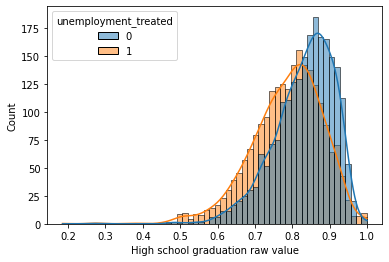

In [16]:
sns.histplot(data=df, x="High school graduation raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Some college raw value', ylabel='Count'>

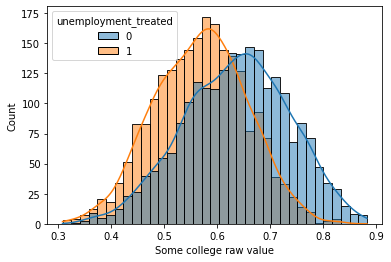

In [17]:
sns.histplot(data=df, x="Some college raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Unemployment raw value', ylabel='Count'>

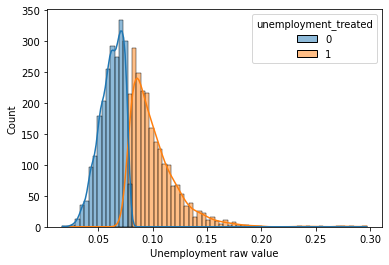

In [18]:
sns.histplot(data=df, x="Unemployment raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Median household income raw value', ylabel='Count'>

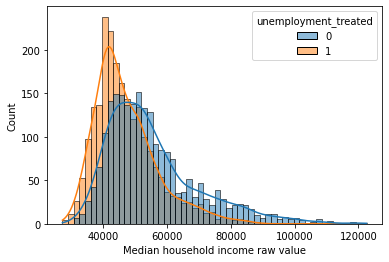

In [19]:
sns.histplot(data=df, x="Median household income raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Poor mental health days raw value', ylabel='Count'>

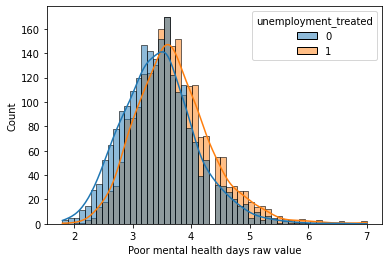

In [20]:
sns.histplot(data=df, x="Poor mental health days raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Crude Rate', ylabel='Count'>

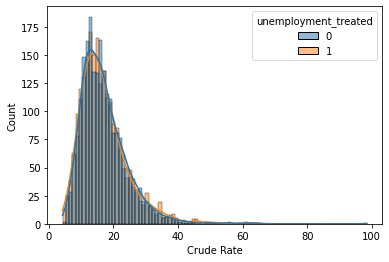

In [21]:
sns.histplot(data=df, x="Crude Rate", hue=categorize_treatment, kde=True)

In [22]:
df[categorize_treatment].value_counts()

1    2221
0    2220
Name: unemployment_treated, dtype: int64

# Unadjusted ATE

In [23]:
# As a comparison measure
print(df['Poor mental health days raw value'].describe())
print()
print(df['Crude Rate'].describe())

count    4441.000000
mean        3.576222
std         0.658032
min         1.800000
25%         3.100000
50%         3.500000
75%         3.900000
max         7.000000
Name: Poor mental health days raw value, dtype: float64

count    4441.000000
mean       17.094686
std         7.478547
min         4.300000
25%        12.000000
50%        15.600000
75%        20.500000
max        98.500000
Name: Crude Rate, dtype: float64


In [25]:
# Unadjusted ATE - Poor mental health days
poor_mental_treated = df[df[categorize_treatment]== 1]['Poor mental health days raw value'].mean()
poor_mental_untreated = df[df[categorize_treatment]== 0]['Poor mental health days raw value'].mean()
print("Lower unemployment = {:0.3f}".format(poor_mental_untreated))
print("Higher unemployment = {:0.3f}".format(poor_mental_treated))
print('Difference in Sample Averages = {:0.3f}'.format(poor_mental_treated - poor_mental_untreated))

Lower unemployment = 3.448
Higher unemployment = 3.704
Difference in Sample Averages = 0.256


In [26]:
# Unadjusted ATE - Suicide rate
poor_mental_treated = df[df[categorize_treatment]== 1]['Crude Rate'].mean()
poor_mental_untreated = df[df[categorize_treatment]== 0]['Crude Rate'].mean()
print("Lower unemployment = {:0.3f}".format(poor_mental_untreated))
print("Higher unemployment = {:0.3f}".format(poor_mental_treated))
print('Difference in Sample Averages = {:0.3f}'.format(poor_mental_treated - poor_mental_untreated))

Lower unemployment = 17.090
Higher unemployment = 17.099
Difference in Sample Averages = 0.009


In [27]:
def OLS_estimate(outcome, covariates):
    covariates = sm.add_constant(covariates) # adding a constant 
    model = sm.OLS(outcome, covariates)
    result = model.fit()
    print(result.summary())

In [28]:
OLS_estimate(df['Poor mental health days raw value'], df[categorize_treatment])

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.038
Model:                                           OLS   Adj. R-squared:                  0.038
Method:                                Least Squares   F-statistic:                     174.8
Date:                               Sun, 28 Nov 2021   Prob (F-statistic):           3.53e-39
Time:                                       17:09:44   Log-Likelihood:                -4356.7
No. Observations:                               4441   AIC:                             8717.
Df Residuals:                                   4439   BIC:                             8730.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                           coef    std err          t      P

In [27]:
OLS_estimate(df['Crude Rate'], df[categorize_treatment])

                            OLS Regression Results                            
Dep. Variable:             Crude Rate   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     323.1
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           8.60e-70
Time:                        21:45:34   Log-Likelihood:                -15080.
No. Observations:                4441   AIC:                         3.016e+04
Df Residuals:                    4439   BIC:                         3.018e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.0429      0.153    124.

In [30]:
df.groupby(categorize_treatment)['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Precipitation', 'RUCC'].agg(['mean'])

C:\Users\alnli\AppData\Local\Temp/ipykernel_22600/729638201.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(categorize_treatment)['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Precipitation', 'RUCC'].agg(['mean'])


,Crude Rate,Poor mental health days raw value,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Precipitation,RUCC
,mean,mean,mean,mean,mean,mean,mean,mean,mean
income_treated,,,,,,,,,
0,19.042928,3.867072,0.784744,0.089691,0.552872,6370.000506,41743.322523,3.666545,3.144144
1,15.147321,3.285502,0.832460,0.073414,0.651785,4154.618241,60751.047276,3.379627,1.902747


Counties with higher income than median have higher high school and college rates, lower unemployment rate, lower poor mental health days, and lower rate of suicide.

# Linear Regressions
Q2: What are the estimated ATE specifications?
- 3 specifications should result in similar coefficients for categorize_treatment

In [31]:
# Specification 1
outcome = df['Poor mental health days raw value']
covariates = df[[categorize_treatment, 'High school graduation raw value']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.197
Model:                                           OLS   Adj. R-squared:                  0.197
Method:                                Least Squares   F-statistic:                     544.5
Date:                               Fri, 26 Nov 2021   Prob (F-statistic):          3.22e-212
Time:                                       21:48:56   Log-Likelihood:                -3955.1
No. Observations:                               4441   AIC:                             7916.
Df Residuals:                                   4438   BIC:                             7935.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                                       coef    std err      

In [32]:
# Specification 2
outcome = df['Poor mental health days raw value']
covariates = df[[categorize_treatment, 'Some college raw value']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.287
Model:                                           OLS   Adj. R-squared:                  0.286
Method:                                Least Squares   F-statistic:                     891.7
Date:                               Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                                       21:48:57   Log-Likelihood:                -3692.4
No. Observations:                               4441   AIC:                             7391.
Df Residuals:                                   4438   BIC:                             7410.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                             coef    std err          t     

In [33]:
# Specification 2.5
outcome = df['Poor mental health days raw value']
covariates = df[[categorize_treatment, 'High school graduation raw value', 'Some college raw value']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.287
Model:                                           OLS   Adj. R-squared:                  0.286
Method:                                Least Squares   F-statistic:                     594.4
Date:                               Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                                       21:48:57   Log-Likelihood:                -3692.3
No. Observations:                               4441   AIC:                             7393.
Df Residuals:                                   4437   BIC:                             7418.
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                                       coef    std err      

In [34]:
# Specification 3
outcome = df['Poor mental health days raw value']
covariates = df[[categorize_treatment, 'Unemployment raw value']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.207
Model:                                           OLS   Adj. R-squared:                  0.207
Method:                                Least Squares   F-statistic:                     578.9
Date:                               Fri, 26 Nov 2021   Prob (F-statistic):          4.09e-224
Time:                                       21:49:00   Log-Likelihood:                -3927.7
No. Observations:                               4441   AIC:                             7861.
Df Residuals:                                   4438   BIC:                             7881.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                             coef    std err          t     

In [36]:
# Specification 4: shouldn't change much
# Real model based on structual causal model
outcome = df['Poor mental health days raw value']
covariates = df[[categorize_treatment, 'Unemployment raw value', 'Ratio of population to mental health providers']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.208
Model:                                           OLS   Adj. R-squared:                  0.207
Method:                                Least Squares   F-statistic:                     387.9
Date:                               Fri, 26 Nov 2021   Prob (F-statistic):          1.00e-223
Time:                                       21:54:11   Log-Likelihood:                -3925.3
No. Observations:                               4441   AIC:                             7859.
Df Residuals:                                   4437   BIC:                             7884.
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                                                     coef   

In [ ]:
real_covariates = ['']

## Propensity Score Matching

Optimization terminated successfully.
         Current function value: 0.688710
         Iterations 4


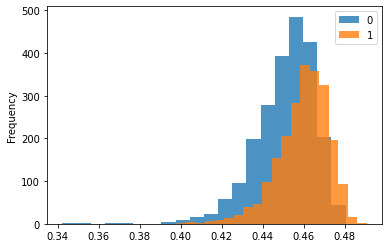

In [52]:
def gen_pscore(data, outcome, covariates):
    model = sm.Logit(outcome, covariates)
    result = model.fit()
    data['pscore'] = result.predict(covariates)
    data.groupby([categorize_treatment]).pscore.plot(kind='hist', bins=20, alpha=0.8, legend=True)

gen_pscore(df, df[categorize_treatment], df['Unemployment raw value'] )

In [54]:
def trim(data):
  control_data = data[data[categorize_treatment] == 0]
  treat_data = data[data[categorize_treatment] == 1]

  min_control, min_treat = control_data.pscore.min(), treat_data.pscore.min()
  max_control, max_treat = control_data.pscore.max(), treat_data.pscore.max()

  min_support = max(min_control, min_treat)
  max_support = min(max_control, max_treat)

  trim_data = data.loc[((data.pscore >= min_support) & (data.pscore <= max_support)),:]
  
  return trim_data

trim_df = trim(df)
trim_df.groupby([categorize_treatment]).pscore.describe()

,count,mean,std,min,25%,50%,75%,max
income_treated,,,,,,,,
0,2231.0,0.451380,0.013709,0.400697,0.443054,0.453390,0.461420,0.480402
1,2206.0,0.459243,0.012137,0.398059,0.452300,0.461033,0.467984,0.480397


### Perform nearest-neighbor matching

In [55]:
def Nearest_Neighbor_Pair(treated_df, non_treated_df):
    treated_x = treated_df['pscore'].values
    non_treated_x = non_treated_df['pscore'].values

    nbrs = NearestNeighbors(n_neighbors=1).fit(np.expand_dims(non_treated_x, axis= 1))
    distances, indices = nbrs.kneighbors(np.expand_dims(treated_x, axis= 1))
    indices = indices.reshape(indices.shape[0])
    matched = non_treated_df.iloc[indices]
    return matched

treated = trim_df[trim_df[categorize_treatment] == 1]
non_treated = trim_df[trim_df[categorize_treatment] == 0]
matched_df = Nearest_Neighbor_Pair(treated, non_treated)
ATE = np.mean(treated['Poor mental health days raw value'].values - matched_df['Poor mental health days raw value'].values)
print('ATE from Nearest Neighbors Matching = {}'.format(round(ATE, 3)))

ATE from Nearest Neighbors Matching = -0.477


### stratification matching

In [58]:
def stratified_matching(data):
  mybins = np.arange(0.0, 1.1, 0.1)
  mylabels = np.arange(1, 11)
  data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)

  # calculate the weights for each strata
  strata_w = data[data[categorize_treatment] == 1].groupby('strata').size()/data[data[categorize_treatment] == 1].groupby('strata').size().sum()
  
  # calculate the ATT for each strata
  strata_ate = data[data[categorize_treatment] == 1].groupby('strata')['Poor mental health days raw value'].mean() - data[data[categorize_treatment] == 0].groupby('strata')['Poor mental health days raw value'].mean()

  # stratefied matching estimate 
  stratefied_ate = (strata_w * strata_ate).sum()  
  print("The stratification matching estimate is {}".format(round(stratefied_ate, 3))) 
  
stratified_matching(trim_df)

The stratification matching estimate is -0.57


C:\Users\alnli\AppData\Local\Temp/ipykernel_34208/2573337602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)


### Inverse Probability Weighted Matching (IPW)

In [59]:
def IPW_estimator(data, T, Y, P):
  ITT = (data[T] * data[Y])/data[P] - ((1 - data[T])* data[Y])/(1 - data[P])
  IPWE = ITT.mean()
  return IPWE 

round(IPW_estimator(trim_df, categorize_treatment, 'Poor mental health days raw value' , 'pscore'), 3)

0.03